# AutoML
----------------

This example shows how to use atom's AutoML implementation to automatically search for an optimized pipeline.

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [22]:
# Import packages
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from atom import ATOMClassifier

In [23]:
# Load the data
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [24]:
atom = ATOMClassifier(X, y, n_jobs=6, verbose=2, warnings=False, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 6 cores.

Dataset stats ==================== >>
Shape: (569, 31)
Memory: 138.96 kB
Scaled: False
Outlier values: 169 (1.2%)
-------------------------------------
Train set size: 456
Test set size: 113
-------------------------------------
|   |     dataset |       train |        test |
| - | ----------- | ----------- | ----------- |
| 0 |   212 (1.0) |   170 (1.0) |    42 (1.0) |
| 1 |   357 (1.7) |   286 (1.7) |    71 (1.7) |



In [25]:
# It's possible to add custom estimators to the pipeline
atom.add(StandardScaler())

Fitting StandardScaler...
Applying StandardScaler to the dataset...


In [26]:
# Check that the scaling worked
atom.scaled

True

In [27]:
# Find an optimized pipeline using AutoML
atom.automl(
    scoring="accuracy",
    max_time_mins=5,
    template="Transformer-Transformer-Classifier",
)

Fitting automl algorithm...


Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9736502627806976

Generation 2 - Current best internal CV score: 0.9736741519350215

Generation 3 - Current best internal CV score: 0.9758480649784997

Generation 4 - Current best internal CV score: 0.9758719541328237

5.06 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: XGBClassifier(PolynomialFeatures(MinMaxScaler(input_matrix), degree=2, include_bias=False, interaction_only=False), learning_rate=0.1, max_depth=1, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)

Merging automl results with atom...
Applying MinMaxScaler to the dataset...
Applying PolynomialFeatures to the dataset...
Adding model XGBoost (XGB) to the pipeline...


## Analyze the results

In [28]:
# The tpot estimator can be accessed for further analysis
atom.tpot

TPOTClassifier(max_time_mins=5, n_jobs=6, random_state=1, scoring='accuracy',
               template='Transformer-Transformer-Classifier', verbosity=2)

In [29]:
# Check the new transformers in the branch
atom.branch.status()

Branch: master
 --> Pipeline: 
   >>> StandardScaler
     --> copy: True
     --> with_mean: True
     --> with_std: True
   >>> MinMaxScaler
     --> feature_range: (0, 1)
     --> copy: True
     --> clip: False
   >>> PolynomialFeatures
     --> degree: 2
     --> interaction_only: False
     --> include_bias: False
     --> order: C
 --> Models: XGB


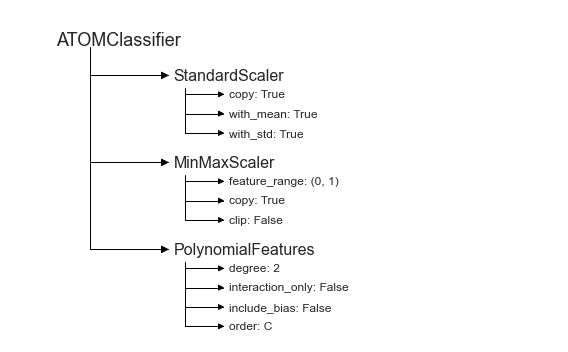

In [30]:
# Or draw the pipeline
atom.plot_pipeline()

In [31]:
# Note that the model is also merged with atom
atom.xgb

XGBoost
 --> Estimator: XGBClassifier
 --> Evaluation: accuracy: 0.9646

In [32]:
# The pipeline can be exported to a sklearn-like pipeline
pl = atom.export_pipeline(model="xgb")
print(pl)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=1,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.85000000